#### About the Data
With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.

In [30]:
## utils functions
%run extras/lab_utils_cls.ipynb

In [35]:
## utils data clean
%run extras/data_clean_util.ipynb

In [20]:
test_file_loc = "https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/01_math_company_hackathon/test.csv"
train_file_loc = "https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/01_math_company_hackathon/train.csv"

In [36]:
df_price_test = Utils.load_data(test_file_loc)
df_price_train = Utils.load_data(train_file_loc)

In [12]:
df_price_train.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [23]:
Utils.df_attributes(df_price_train)  # test

Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int32  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 n

<ipython-input-24-62ee98b8c2be>:235: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return dataset[hist_cols].hist(ax = ax)


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Prod. year'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Airbags'}>]], dtype=object)

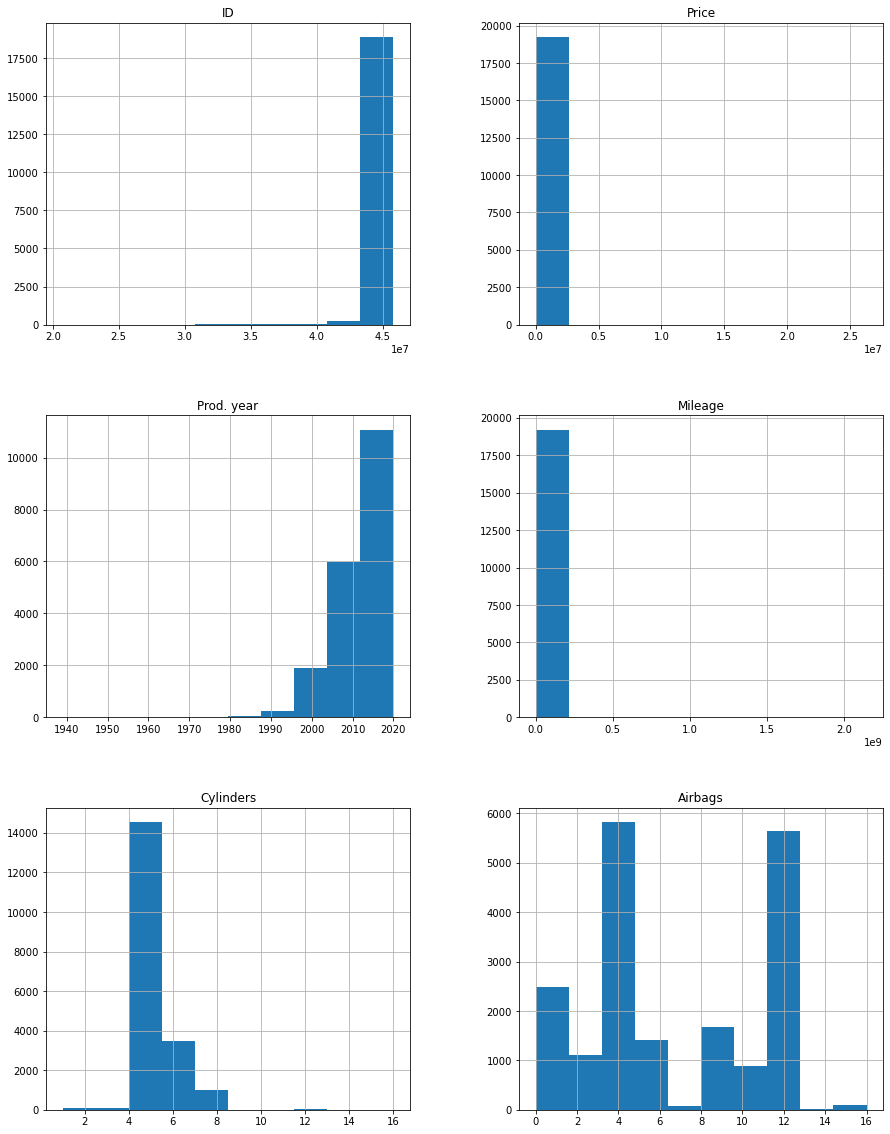

In [26]:
Utils.hist_flt_int(df_price_train)  ## 

Levy


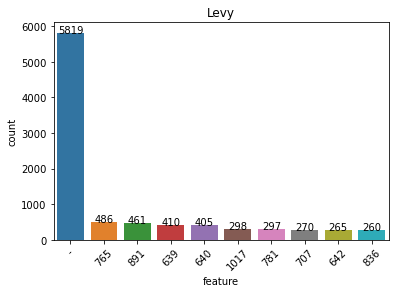

Mileage


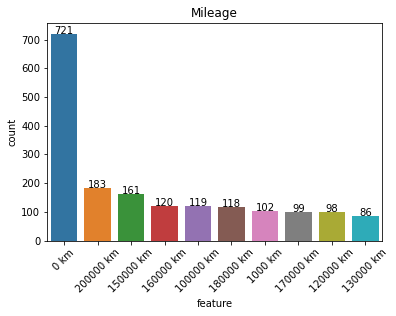

Engine volume


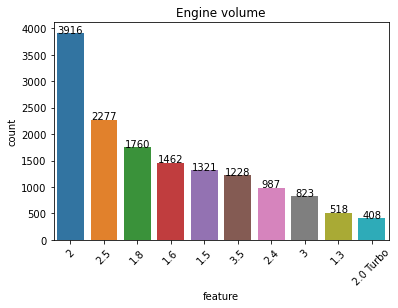

Fuel type


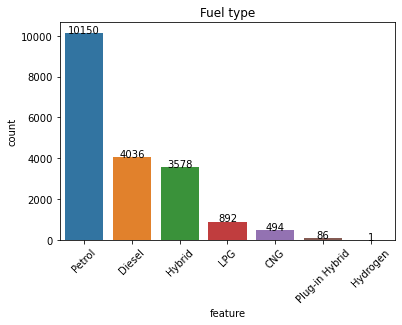

Category


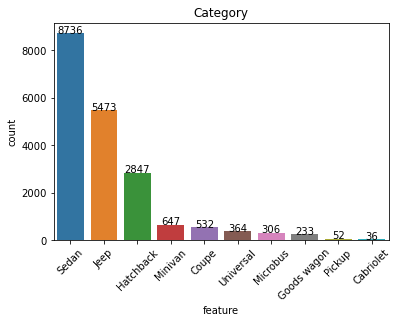

Leather interior


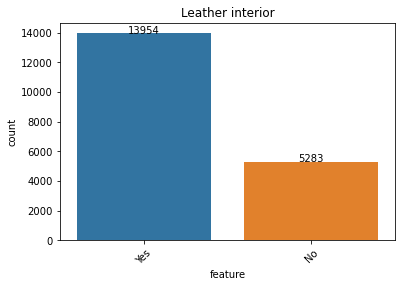

Drive wheels


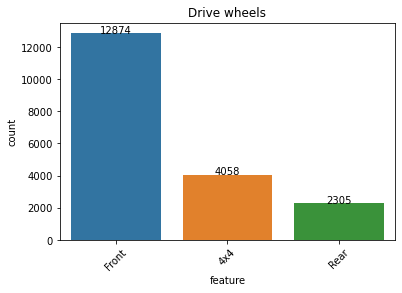

Doors


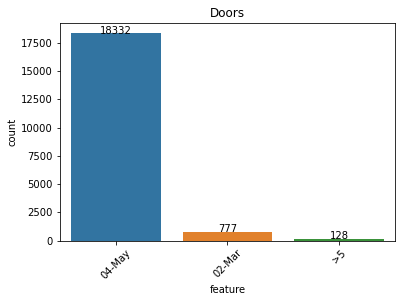

Gear box type


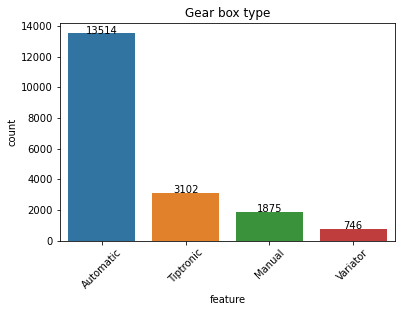

Model


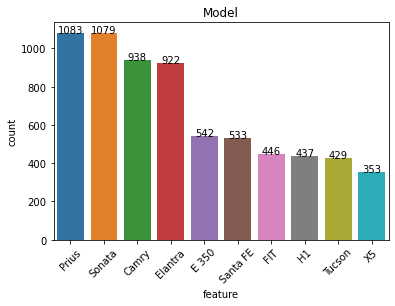

Manufacturer


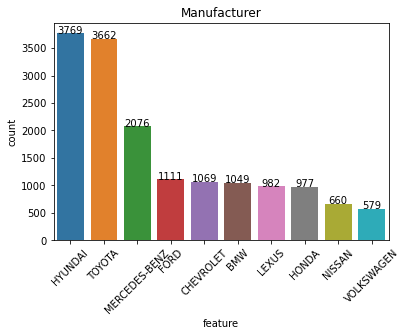

Color


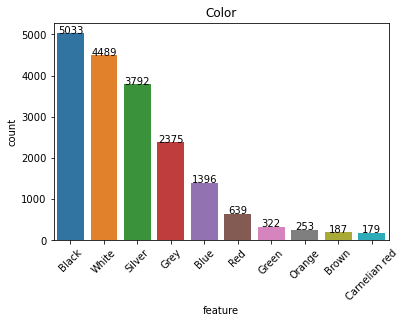

Wheel


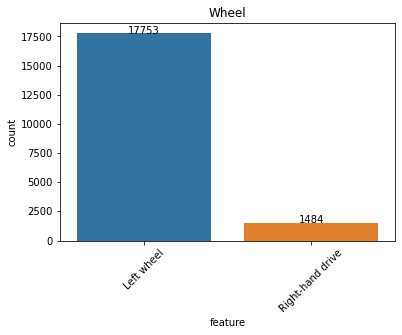

In [8]:
Utils.plot_categorical_bar(df_price_train)

In [9]:
DataClean.missing_percentage(df_price_train)

|    | features         |   null_count |   total |   missing_percent |
|---:|:-----------------|-------------:|--------:|------------------:|
|  0 | ID               |            0 |   19237 |                 0 |
|  1 | Price            |            0 |   19237 |                 0 |
| 16 | Color            |            0 |   19237 |                 0 |
| 15 | Wheel            |            0 |   19237 |                 0 |
| 14 | Doors            |            0 |   19237 |                 0 |
| 13 | Drive wheels     |            0 |   19237 |                 0 |
| 12 | Gear box type    |            0 |   19237 |                 0 |
| 11 | Cylinders        |            0 |   19237 |                 0 |
| 10 | Mileage          |            0 |   19237 |                 0 |
|  9 | Engine volume    |            0 |   19237 |                 0 |
|  8 | Fuel type        |            0 |   19237 |                 0 |
|  7 | Leather interior |            0 |   19237 |                 0 |
|  6 |

features  null_count  total  missing_percent
0                 ID           0  19237              0.0
1              Price           0  19237              0.0
16             Color           0  19237              0.0
15             Wheel           0  19237              0.0
14             Doors           0  19237              0.0
13      Drive wheels           0  19237              0.0
12     Gear box type           0  19237              0.0
11         Cylinders           0  19237              0.0
10           Mileage           0  19237              0.0
9      Engine volume           0  19237              0.0
8          Fuel type           0  19237              0.0
7   Leather interior           0  19237              0.0
6           Category           0  19237              0.0
5         Prod. year           0  19237              0.0
4              Model           0  19237              0.0
3       Manufacturer           0  19237              0.0
2               Levy           0  19237              0.0
17           Airbags           0  19237              0.0

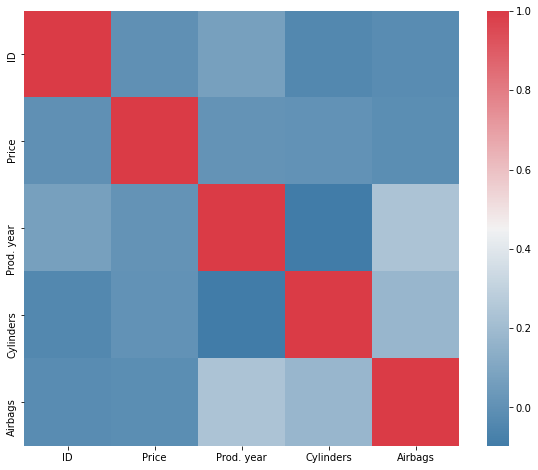

In [10]:
%matplotlib inline
Utils.plot_corr(df_price_train)

#### EDA on price

1. The column has all sort of values which do not reflect the true price. 
2. Might need to add some extra columns as well

<AxesSubplot:>

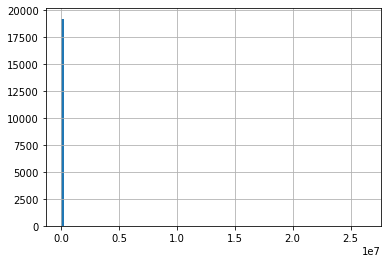

In [21]:
df_price_train.Price.hist(bins = 100)

<AxesSubplot:>

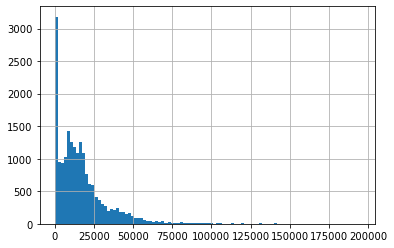

In [19]:
df_price_train[df_price_train["Price"]<=200000].Price.hist(bins = 100)

<AxesSubplot:>

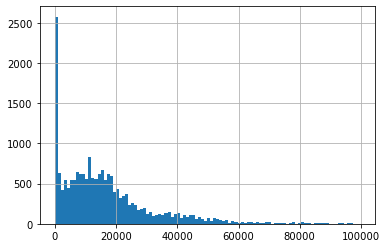

In [20]:
df_price_train[df_price_train["Price"]<=100000].Price.hist(bins = 100)

<AxesSubplot:>

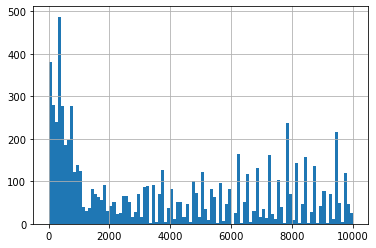

In [22]:
df_price_train[df_price_train["Price"]<=10000].Price.hist(bins = 100)

We already know the distribution of prices is skewed to the right, the there is a larger tail of the right. Lets plot the log transformation. <br>
This comes after I noticied negative values in the prediction, this is becuase the problem is unbounded. This problem wont be there is random forest is used. 

<AxesSubplot:>

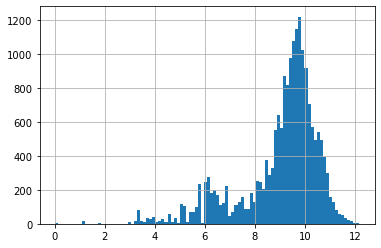

In [5]:
np.log(df_price_train[df_price_train["Price"]<=200000].Price).hist(bins = 100)

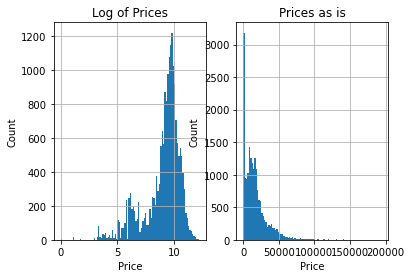

In [29]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
# plt.figure(figsize=(10,10))
np.log(df_price_train[df_price_train["Price"]<=200000].Price).hist(bins = 100)
plt.title("Log of Prices")
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # index 2
# plt.figure(figsize=(10,10))
df_price_train[df_price_train["Price"]<=200000].Price.hist(bins = 100)
plt.title("Prices as is")
plt.xlabel('Price')
plt.ylabel('Count')

plt.show()

We can notice that log of prices, the data viz is more gaussian

In [24]:
df_price_train.Price.value_counts().reset_index()

index  Price
0     15681    280
1       470    274
2     14113    244
3       392    242
4       314    235
...     ...    ...
2310  14686      1
2311  12639      1
2312  18800      1
2313  16753      1
2314  16408      1

[2315 rows x 2 columns]

As about 25% of the values are empty we neglect this column - __LEVY__

In [25]:
df_price_train.Levy.value_counts().reset_index()

index  Levy
0       -  5819
1     765   486
2     891   461
3     639   410
4     640   405
..    ...   ...
554  4057     1
555  2505     1
556  2874     1
557  7063     1
558  1924     1

[559 rows x 2 columns]

In [28]:
df_price_train['Mileage'].value_counts().reset_index()

index  Mileage
0          0 km      721
1     200000 km      183
2     150000 km      161
3     160000 km      120
4     100000 km      119
...         ...      ...
7682  167300 km        1
7683  120534 km        1
7684  306266 km        1
7685  192534 km        1
7686  158842 km        1

[7687 rows x 2 columns]

In [26]:
df_price_train['Engine volume'].value_counts().reset_index()

index  Engine volume
0            2           3916
1          2.5           2277
2          1.8           1760
3          1.6           1462
4          1.5           1321
..         ...            ...
102  0.8 Turbo              1
103  1.1 Turbo              1
104        6.7              1
105  5.7 Turbo              1
106        5.2              1

[107 rows x 2 columns]

Scatter plots

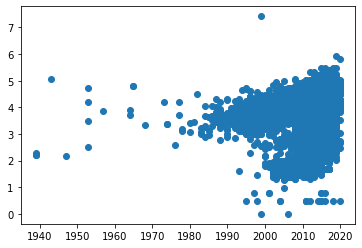

In [33]:
from math import log
plt.scatter(df_price_train["Prod. year"], np.log10(df_price_train.Price))

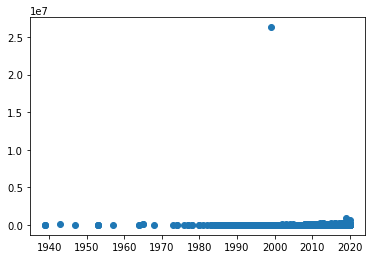

In [34]:
plt.scatter(df_price_train["Prod. year"], (df_price_train.Price))

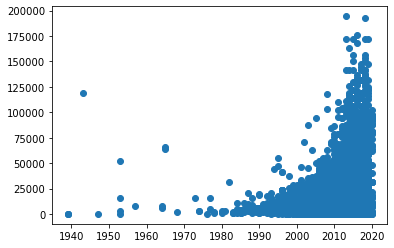

In [36]:
less_than_thresh = df_price_train[df_price_train["Price"]<=200000]

plt.scatter(less_than_thresh["Prod. year"], (less_than_thresh.Price))

The data in itself isnt very reliable, Ideally we would expect say 16 airbags to atleast start from 10K or more. But as we can see it starts from 0. 

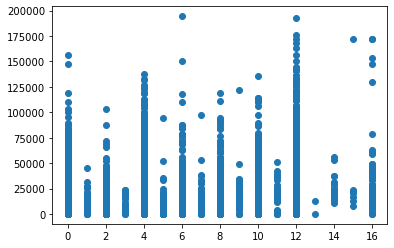

In [38]:
plt.scatter(less_than_thresh["Airbags"], (less_than_thresh.Price))

#### Mileage vs Prod year 

In [20]:
display(df_price_train["Mileage"])

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int32

In [19]:
df_price_train["Mileage"] = df_price_train["Mileage"].str.replace("km", "")
# display(df_price_train["Mileage"])
df_price_train["Mileage"] = df_price_train["Mileage"].astype(int)

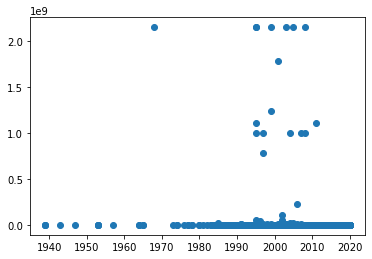

In [21]:
plt.scatter(df_price_train["Prod. year"], (df_price_train.Mileage))

<AxesSubplot:>

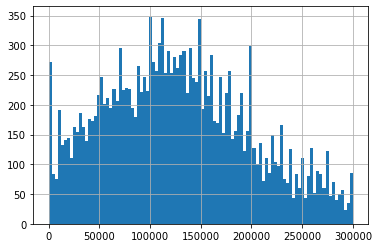

In [91]:
(df_price_train[(df_price_train["Mileage"]<=300000) & (df_price_train["Mileage"] > 0)].Mileage).hist(bins = 100)

<AxesSubplot:>

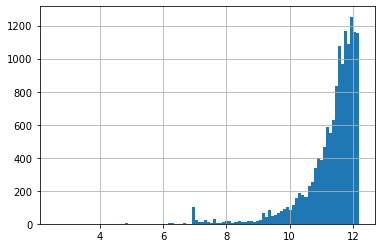

In [29]:
np.log(df_price_train[(df_price_train["Mileage"]<=200000) & (df_price_train["Mileage"] > 0)].Mileage).hist(bins = 100)

<AxesSubplot:>

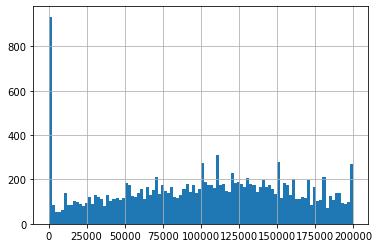

In [28]:
(df_price_train[df_price_train["Mileage"]<=200000].Mileage).hist(bins = 100)

#### 20210710

Once the dataset is moderately clean to, run catboost algorithm and then get feature importance. This gives an idea as to which columns needs to be cleaned and updated. Without feature engineering or cleaning much of the data, 1.11 was the score on the leaderboard. Something under 0.8 is a good score. 

![image.png](img\feature_imp.png)

#### 001 Airbags  (cont)
1. This should be categorical variable because, its nominal, it increases.
2. The graph looks ok. Ideally, you see 2-4-8-12 may be, but then there are other numbers too. Does it make sense to have them? business sense?
3. Zero Air bags are older vehicles we could use cut of year after which all vehicles have a minimum number of air bags
4. No manipulation, keep as is. 

#### 002 Engine volume (cont)
1. clean and add engine volume.
2. Remove all 0 engine volume, about 10 data points. 
3. Add a extra columns 0 and 1 for turbo and non turbo. 
4. Continuous Variable.
5. HYUNDAI	Sonata - we have engine volume at 20 for 2, either remove them or cap them. 

#### 003 Mileage (cont)
1. About 700 0's, and replace it with mean of the years. 
2. Remove the Km and make it continuous. 
3. (df_price_train[(df_price_train["Mileage"]<=200000) & (df_price_train["Mileage"] > 0)].Mileage).hist(bins = 100)  Capping upper and lower limit

#### 004 year (cont)
1. It can be taken as cat or continuous. TODO: Check whats the difference?
2. In this case we consider it to be categorical, in next iterations will consider it continuous. 

#### 005 Cylinders (cont)
#### 006 Gear box type (cat)
#### 007 Drive wheels (cat)
#### 008 Category (cat)
#### 009 Leather interior (cat)
#### 010 Fuel type (cat)
#### 011 Manufacturer (cat)
#### 012 Wheel (Cat)
#### 013 Color (cat)
<br>
Keep as is for now.

#### 014 Levy Missing values of about 25%
#### 015 model as feature importance is low
#### 016 doors as feature importance is low
<br>
Remove them 

#### 001 clean engine columns

In [32]:
df_price_train[['Engine volume','turbo_flag_n']] = df_price_train['Engine volume'].str.split(' ',expand=True)
df_price_train.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid           3.5   186005        6.0     Automatic   
1               No    Petrol             3   192000        6.0     Tiptronic   
2               No    Petrol           1.3   200000        4.0      Variator   
3              Yes    Hybrid           2.5   168966        4.0     Automatic   
4              Yes    Petrol           1.3    91901        4.0     Automatic   

  Drive wheels   Doors             Wheel   Color  Airbags turbo_flag_n  
0          4x4  04-May        Left wheel  Silver       12         None  
1          4x4  04-May        Left wheel   Black        8         None  
2        Front  04-May  Right-hand drive   Black        2         None  
3          4x4  04-May        Left wheel   White        0         None  
4        Front  04-May        Left wheel  Silver        4         None

In [36]:
df_price_train['turbo_flag_n'].fillna("non_turbo", inplace = True)

In [37]:
df_price_train.turbo_flag_n.value_counts()

non_turbo    17306
Turbo         1931
Name: turbo_flag_n, dtype: int64

In [47]:
df_price_train["Engine volume"] = df_price_train["Engine volume"].astype(float)

In [48]:
df_price_train = df_price_train[(df_price_train["Engine volume"] > 0)]

In [49]:
df_price_train["Engine volume"].value_counts()

2.0    4324
2.5    2370
1.8    1937
1.6    1578
1.5    1393
       ... 
6.8       1
0.5       1
5.8       1
7.3       1
3.1       1
Name: Engine volume, Length: 64, dtype: int64

<AxesSubplot:>

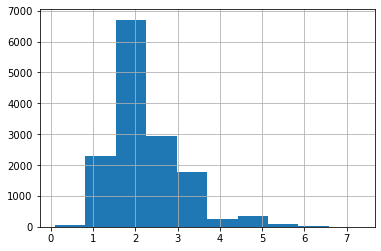

In [52]:
(df_price_train[(df_price_train["Mileage"]<=200000) & (df_price_train["Mileage"] > 0)]["Engine volume"]).hist(bins = 10)

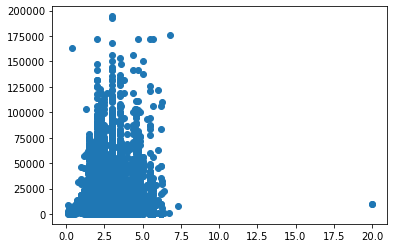

In [53]:
less_than_thresh = df_price_train[df_price_train["Price"]<=200000]

plt.scatter( (less_than_thresh["Engine volume"]),less_than_thresh["Price"])

In [55]:
df_price_train[df_price_train["Engine volume"] > 10]

ID  Price  Levy Manufacturer   Model  Prod. year Category  \
2357   45803214  10036  5603      HYUNDAI  Sonata        2014    Sedan   
17777  45732659  10036  5603      HYUNDAI  Sonata        2014    Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
2357               Yes       LPG           20.0   333686        4.0   
17777              Yes       LPG           20.0   333686        4.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  \
2357      Automatic        Front  04-May  Left wheel  Silver        4   
17777     Automatic        Front  04-May  Left wheel  Silver        4   

      turbo_flag_n  
2357     non_turbo  
17777    non_turbo

> This needs to capped to 2. as major hyundai has 2. Engine volume where 20 needs to be 2. 

In [56]:
df_price_train[df_price_train["Engine volume"] == 0]

Empty DataFrame
Columns: [ID, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags, turbo_flag_n]
Index: []

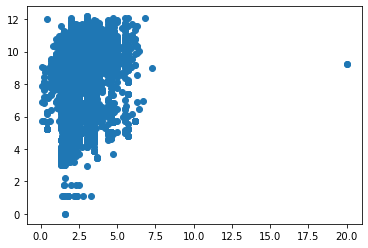

In [58]:
less_than_thresh = df_price_train[df_price_train["Price"]<=200000]

plt.scatter( (less_than_thresh["Engine volume"]),np.log(less_than_thresh["Price"]))

#### 002 Clean mileage

In [63]:
df_price_train["Mileage"] = df_price_train["Mileage"].str.replace("km", "")
df_price_train["Mileage"] = df_price_train["Mileage"].astype(int)
df_price_train

ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid           3.5   186005        6.0   
1                   No    Petrol             3   192000        6.0   
2                   No    Petrol           1.3   200000        4.0   
3                  Yes    Hybrid           2.5   168966        4.0   
4                  Yes    Petrol           1.3    91901        4.0   
...                ...       ...           ...      ...        ...   
19232              Yes       CNG     2.0 Turbo   300000        4.0   
19233              Yes    Petrol           2.4   161600        4.0   
19234              Yes    Diesel             2   116365        4.0   
19235              Yes    Diesel             2    51258        4.0   
19236              Yes    Hybrid           2.4   186923        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

In [65]:
df_price_train.dtypes
## clip at 200000

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int32
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [ ]:
df_price_train = df_price_train[df_price_train["Mileage"]<=200000]

In [72]:
test = df_price_train.groupby(["Prod. year"]).agg({"Mileage":np.mean}).reset_index()
test.columns = ["Prod. year", "Mileage_avg"]
test.head()

Prod. year    Mileage_avg
0        1939  141333.333333
1        1943   69000.000000
2        1947  165000.000000
3        1953  125000.000000
4        1957       0.000000

In [104]:
new_df = df_price_train.merge(test, how='left', on = ["Prod. year"])
new_df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid           3.5   186005        6.0     Automatic   
1               No    Petrol             3   192000        6.0     Tiptronic   
2               No    Petrol           1.3   200000        4.0      Variator   
3              Yes    Hybrid           2.5   168966        4.0     Automatic   
4              Yes    Petrol           1.3    91901        4.0     Automatic   

  Drive wheels   Doors             Wheel   Color  Airbags    Mileage_avg  
0          4x4  04-May        Left wheel  Silver       12  172769.460553  
1          4x4  04-May        Left wheel   Black        8  846951.589950  
2        Front  04-May  Right-hand drive   Black        2  899677.861199  
3          4x4  04-May        Left wheel   White        0  846951.589950  
4        Front  04-May        Left wheel  Silver        4  140214.078625

In [78]:
df_price_train[df_price_train["Mileage"] == 0 ]

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
11     45814819   8781     -         FORD  Transit        1999   Microbus   
24     45813492   4704     -         OPEL   Vectra        1995      Sedan   
26     45759112    549  2455        LEXUS   GX 470        2008       Jeep   
83     45765301   8154     -        HONDA     Cr-v        1998       Jeep   
97     45749534   4234     -        HONDA    Civic        1997  Hatchback   
...         ...    ...   ...          ...      ...         ...        ...   
19064  45791823   2900     -          BMW      320        1994      Sedan   
19088  45782030   2200     -      PEUGEOT      406        2001      Sedan   
19103  45748748     30     -       NISSAN    Tiida        2006  Hatchback   
19218  45748699     30     -       NISSAN     Note        2006  Hatchback   
19223  44571028   8781     -        DODGE  Caliber        2008  Hatchback   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
11                  No       CNG             4        0        8.0   
24                  No    Petrol           1.8        0        4.0   
26                 Yes    Petrol           4.7        0        8.0   
83                  No    Petrol             2        0        4.0   
97                 Yes    Petrol           1.4        0        4.0   
...                ...       ...           ...      ...        ...   
19064              Yes    Petrol             2        0        6.0   
19088               No    Petrol             2        0        4.0   
19103               No    Petrol           1.5        0        4.0   
19218               No    Petrol           1.3        0        4.0   
19223               No    Petrol           2.4        0        4.0   

      Gear box type Drive wheels   Doors             Wheel  Color  Airbags  
11           Manual         Rear  02-Mar        Left wheel   Blue        0  
24        Automatic        Front  04-May        Left wheel  Green        4  
26        Automatic          4x4  04-May        Left wheel  White        0  
83        Automatic          4x4  04-May  Right-hand drive  White        2  
97           Manual        Front  02-Mar        Left wheel   Blue        6  
...             ...          ...     ...               ...    ...      ...  
19064        Manual         Rear  04-May        Left wheel  Green        2  
19088        Manual        Front  04-May        Left wheel  White        2  
19103     Automatic        Front  04-May  Right-hand drive  Black        4  
19218     Automatic        Front  04-May  Right-hand drive  Green        9  
19223     Automatic        Front  04-May        Left wheel   Blue        4  

[721 rows x 18 columns]

In [76]:
np.where(new_df.Mileage == 0, new_df.Mileage_avg, new_df.Mileage)

array([186005., 192000., 200000., ..., 116365.,  51258., 186923.])

In [105]:
new_df.Mileage = np.where(new_df.Mileage == 0, new_df.Mileage_avg, new_df.Mileage)

In [106]:
new_df[new_df["Mileage"] == 0 ]

ID  Price Levy Manufacturer  Model  Prod. year Category  \
9493  45598183   7527    -          UAZ  31514        1957     Jeep   

     Leather interior Fuel type Engine volume  Mileage  Cylinders  \
9493               No    Petrol             2      0.0        4.0   

     Gear box type Drive wheels   Doors       Wheel   Color  Airbags  \
9493        Manual          4x4  02-Mar  Left wheel  Yellow        0   

      Mileage_avg  
9493          0.0

In [107]:
new_df = new_df[new_df["Mileage"] > 0 ]

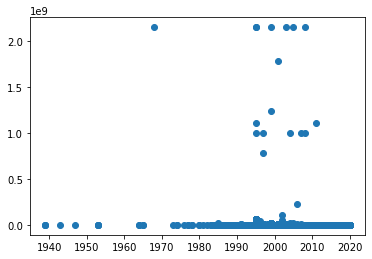

In [108]:
plt.scatter(new_df["Prod. year"], (new_df.Mileage))

In [109]:
new_df[new_df["Mileage"] > 2000000 ].head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
11   45814819   8781     -         FORD  Transit        1999   Microbus   
24   45813492   4704     -         OPEL   Vectra        1995      Sedan   
26   45759112    549  2455        LEXUS   GX 470        2008       Jeep   
97   45749534   4234     -        HONDA    Civic        1997  Hatchback   
182  45793851   3450     -         OPEL   Vectra        1995      Sedan   

    Leather interior Fuel type Engine volume       Mileage  Cylinders  \
11                No       CNG             4  1.652893e+07        8.0   
24                No    Petrol           1.8  6.173324e+07        4.0   
26               Yes    Petrol           4.7  4.460475e+06        8.0   
97               Yes    Petrol           1.4  1.203147e+07        4.0   
182               No       CNG             2  6.173324e+07        4.0   

    Gear box type Drive wheels   Doors       Wheel  Color  Airbags  \
11         Manual         Rear  02-Mar  Left wheel   Blue        0   
24      Automatic        Front  04-May  Left wheel  Green        4   
26      Automatic          4x4  04-May  Left wheel  White        0   
97         Manual        Front  02-Mar  Left wheel   Blue        6   
182        Manual        Front  04-May  Left wheel  White        2   

      Mileage_avg  
11   1.652893e+07  
24   6.173324e+07  
26   4.460475e+06  
97   1.203147e+07  
182  6.173324e+07

<AxesSubplot:>

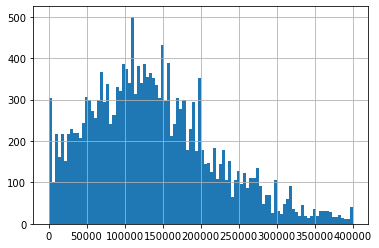

In [117]:
(df_price_train[(df_price_train["Mileage"]<=400000) & (df_price_train["Mileage"] > 0)].Mileage).hist(bins = 100)

In [111]:
# new_df['Mileage'] = new_df['Mileage'].clip(upper= 300000)

new_df.Mileage = np.where(new_df.Mileage > 300000 , 300000, new_df.Mileage)

In [112]:
new_df[new_df["Mileage"] > 3000000 ]

Empty DataFrame
Columns: [ID, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags, Mileage_avg]
Index: []

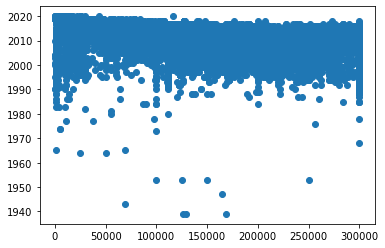

In [114]:
plt.scatter((new_df.Mileage), new_df["Prod. year"])

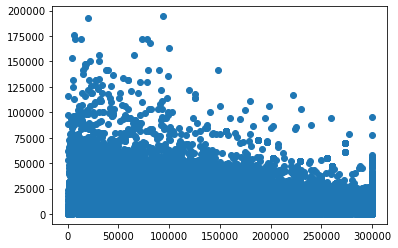

In [116]:
new_df = new_df[new_df["Price"] <= 200000]
plt.scatter((new_df.Mileage), new_df["Price"])

Looking at the above graph it doesnt make sense to me to clean set till 3L cut off, so raising it to 4L.

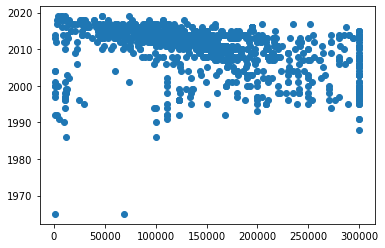

In [119]:
new_df_ford = new_df[new_df["Manufacturer"] == "FORD"]
plt.scatter((new_df_ford.Mileage), new_df_ford["Prod. year"])

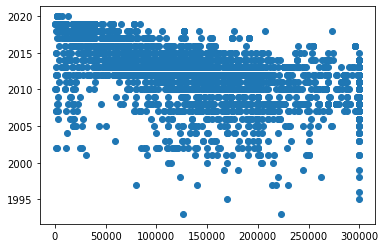

In [120]:
new_df_ford = new_df[new_df["Manufacturer"] == "TOYOTA"]
plt.scatter((new_df_ford.Mileage), new_df_ford["Prod. year"])

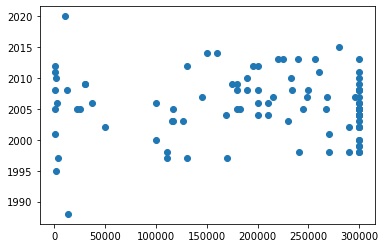

In [122]:
new_df_ford = new_df[(new_df["Manufacturer"] == "MERCEDES-BENZ") &(new_df["Category"] == "Microbus")]
plt.scatter((new_df_ford.Mileage), new_df_ford["Prod. year"])

__We can conclude that year - manufactorr and category are granular enough to replace mileage.__

In [126]:
new_df[new_df["Manufacturer"] == "áƒ¡áƒ®áƒ•áƒ"]

Empty DataFrame
Columns: [ID, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags, Mileage_avg]
Index: []

In [127]:
new_df.Manufacturer.contains('áƒ¡áƒ®áƒ•áƒ', case = False)


AttributeError: 'Series' object has no attribute 'contains'

In [129]:
new_df[new_df['Manufacturer'].str.contains("áƒ")]

Empty DataFrame
Columns: [ID, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags, Mileage_avg]
Index: []

#### use data clean util function to clean the columns

In [139]:
df_price_train["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [144]:
new_1 = CarDataClean.clean_eng_vol(df_price_train)
new_1.head()

(19237, 18)
(19225, 19)


ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid            3.5  186005 km        6.0   
1               No    Petrol            3.0  192000 km        6.0   
2               No    Petrol            1.3  200000 km        4.0   
3              Yes    Hybrid            2.5  168966 km        4.0   
4              Yes    Petrol            1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  \
0     Automatic          4x4  04-May        Left wheel  Silver       12   
1     Tiptronic          4x4  04-May        Left wheel   Black        8   
2      Variator        Front  04-May  Right-hand drive   Black        2   
3     Automatic          4x4  04-May        Left wheel   White        0   
4     Automatic        Front  04-May        Left wheel  Silver        4   

  turbo_flag_n  
0    non_turbo  
1    non_turbo  
2    non_turbo  
3    non_turbo  
4    non_turbo

In [145]:
new_2 = CarDataClean.clean_mileage(new_1)
new_2.head()

(19225, 19)
(18505, 20)


ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid            3.5   186005        6.0     Automatic   
1               No    Petrol            3.0   192000        6.0     Tiptronic   
2               No    Petrol            1.3   200000        4.0      Variator   
3              Yes    Hybrid            2.5   168966        4.0     Automatic   
4              Yes    Petrol            1.3    91901        4.0     Automatic   

  Drive wheels   Doors             Wheel   Color  Airbags turbo_flag_n  \
0          4x4  04-May        Left wheel  Silver       12    non_turbo   
1          4x4  04-May        Left wheel   Black        8    non_turbo   
2        Front  04-May  Right-hand drive   Black        2    non_turbo   
3          4x4  04-May        Left wheel   White        0    non_turbo   
4        Front  04-May        Left wheel  Silver        4    non_turbo   

     Mileage_avg  
0  238692.836158  
1  134871.062500  
2  518585.461538  
3  155819.148148  
4  101361.448980

In [146]:
new_2.to_csv("cleaned_20210710_2339.csv", index = False)

In [152]:
new_test = CarDataClean.clean_eng_vol(df_price_test)
new_test.head()

(8245, 18)
(8245, 19)


ID Levy Manufacturer   Model  Prod. year   Category Leather interior  \
0  44020629    -   VOLKSWAGEN    Golf        2012  Hatchback               No   
1  45784798    -      HYUNDAI  Sonata        2012      Sedan              Yes   
2  45800257    -       NISSAN   Tiida        2005      Sedan               No   
3  45797981  975        VOLVO    XC90        2012       Jeep              Yes   
4  45814303    -         OPEL   Astra        1993  Hatchback               No   

  Fuel type  Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel            2.0       0 km          4        Manual        Front   
1    Petrol            2.4   26000 km          4     Tiptronic        Front   
2    Petrol            1.5  168000 km          4     Automatic        Front   
3    Petrol            3.2  143000 km          6     Automatic          4x4   
4    Petrol            1.6  200000 km          4        Manual        Front   

    Doors             Wheel     Color  Airbags  Price turbo_flag_n  
0  02-Mar        Left wheel      Grey       10    NaN        Turbo  
1  04-May        Left wheel      Grey       10    NaN    non_turbo  
2  04-May  Right-hand drive  Sky blue        8    NaN    non_turbo  
3  04-May        Left wheel      Blue       12    NaN    non_turbo  
4  04-May        Left wheel     Black        0    NaN    non_turbo

In [153]:
new__test_2 = CarDataClean.clean_mileage(new_test)
new__test_2.head()

(8245, 19)
(8245, 20)


ID Levy Manufacturer   Model  Prod. year   Category Leather interior  \
0  44020629    -   VOLKSWAGEN    Golf        2012  Hatchback               No   
1  45784798    -      HYUNDAI  Sonata        2012      Sedan              Yes   
2  45800257    -       NISSAN   Tiida        2005      Sedan               No   
3  45797981  975        VOLVO    XC90        2012       Jeep              Yes   
4  45814303    -         OPEL   Astra        1993  Hatchback               No   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel            2.0        0          4        Manual        Front   
1    Petrol            2.4    26000          4     Tiptronic        Front   
2    Petrol            1.5   168000          4     Automatic        Front   
3    Petrol            3.2   143000          6     Automatic          4x4   
4    Petrol            1.6   200000          4        Manual        Front   

    Doors             Wheel     Color  Airbags  Price turbo_flag_n  \
0  02-Mar        Left wheel      Grey       10    NaN        Turbo   
1  04-May        Left wheel      Grey       10    NaN    non_turbo   
2  04-May  Right-hand drive  Sky blue        8    NaN    non_turbo   
3  04-May        Left wheel      Blue       12    NaN    non_turbo   
4  04-May        Left wheel     Black        0    NaN    non_turbo   

     Mileage_avg  
0  101825.500000  
1  149978.098214  
2  145801.142857  
3  117750.000000  
4  200000.000000

In [154]:
new__test_2.to_csv("cleaned_20210711_0005_test.csv", index = False)

#### 20210711

Need to figure out this threshold. 

In [ ]:
#         df_price_train = df_price_train[(df_price_train["Engine volume"] > 0)]
#         df_price_train = df_price_train[(df_price_train["Engine volume"] < 10)]

In [ ]:
#         new_df = new_df[new_df["Mileage"] > 0 ]

In [6]:
new_test = CarDataClean.clean_eng_vol(df_price_test)
new_test.head()

(8245, 18)
(8239, 19)


ID Levy Manufacturer   Model  Prod. year   Category Leather interior  \
0  44020629    -   VOLKSWAGEN    Golf        2012  Hatchback               No   
1  45784798    -      HYUNDAI  Sonata        2012      Sedan              Yes   
2  45800257    -       NISSAN   Tiida        2005      Sedan               No   
3  45797981  975        VOLVO    XC90        2012       Jeep              Yes   
4  45814303    -         OPEL   Astra        1993  Hatchback               No   

  Fuel type  Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel            2.0       0 km          4        Manual        Front   
1    Petrol            2.4   26000 km          4     Tiptronic        Front   
2    Petrol            1.5  168000 km          4     Automatic        Front   
3    Petrol            3.2  143000 km          6     Automatic          4x4   
4    Petrol            1.6  200000 km          4        Manual        Front   

    Doors             Wheel     Color  Airbags  Price turbo_flag_n  
0  02-Mar        Left wheel      Grey       10    NaN        Turbo  
1  04-May        Left wheel      Grey       10    NaN    non_turbo  
2  04-May  Right-hand drive  Sky blue        8    NaN    non_turbo  
3  04-May        Left wheel      Blue       12    NaN    non_turbo  
4  04-May        Left wheel     Black        0    NaN    non_turbo

In [7]:
new__test_2 = CarDataClean.clean_mileage(new_test)
new__test_2.head()

(8239, 19)
(7947, 20)


ID Levy Manufacturer   Model  Prod. year   Category Leather interior  \
1  45784798    -      HYUNDAI  Sonata        2012      Sedan              Yes   
2  45800257    -       NISSAN   Tiida        2005      Sedan               No   
3  45797981  975        VOLVO    XC90        2012       Jeep              Yes   
4  45814303    -         OPEL   Astra        1993  Hatchback               No   
5  45812490  639          BMW     320        2014      Sedan              Yes   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
1    Petrol            2.4    26000          4     Tiptronic        Front   
2    Petrol            1.5   168000          4     Automatic        Front   
3    Petrol            3.2   143000          6     Automatic          4x4   
4    Petrol            1.6   200000          4        Manual        Front   
5    Petrol            2.0    59733          4     Tiptronic         Rear   

    Doors             Wheel     Color  Airbags  Price turbo_flag_n  \
1  04-May        Left wheel      Grey       10    NaN    non_turbo   
2  04-May  Right-hand drive  Sky blue        8    NaN    non_turbo   
3  04-May        Left wheel      Blue       12    NaN    non_turbo   
4  04-May        Left wheel     Black        0    NaN    non_turbo   
5  04-May        Left wheel     Black       12    NaN        Turbo   

     Mileage_avg  
1  149978.098214  
2  145801.142857  
3  117750.000000  
4  200000.000000  
5  134080.285714

> More data points are missing due to mileage. So it sense to fix clip them and check. 

#### try 002

1. Mileage
        1. convert mileage to continuous 
        2. replace 0 mileage with average mileage of a year- based on EDA. 
        3. Capping upper limit based on 
        (df_price_train[(df_price_train["Mileage"]<=400000) & (df_price_train["Mileage"] > 0)].Mileage).hist(bins = 100)
        4. remove less than equal to 0 mileage
2. Engine Volume
        1. split engine volume and make engine volume columns float. 
        2. in the new column turbo_flag_n, replace None with cat. 
        3. Remove outliers capped at 0 and 10 lower and upper bound
        
The above was the old approach, rn clipping mileage at 40K and 0k and engine volume at 0 and 10

The cipping idea dint bear good results. The results remain the same from the previous. 

Removing the clipping for engine volumen and mileage. 

Adding levy and removing cylinder had some value. I am missing something here. Not sure what. 

Making continous to categorical reduced the model accuracy. 

Only continuos did a good job, but not great. I am still missing something, based on feature importance I have chosen, let me try the grid search again with 100 iter

Tree depth increases model traingint time

The one hot encoding parameter doesnt add much value here yet. Will try some other variations.

In [37]:
new_1 = CarDataClean.clean_eng_vol(df_price_train)
new_1.head()

(19237, 18)
(19237, 19)


ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid            3.5  186005 km        6.0   
1               No    Petrol            3.0  192000 km        6.0   
2               No    Petrol            1.3  200000 km        4.0   
3              Yes    Hybrid            2.5  168966 km        4.0   
4              Yes    Petrol            1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  \
0     Automatic          4x4  04-May        Left wheel  Silver       12   
1     Tiptronic          4x4  04-May        Left wheel   Black        8   
2      Variator        Front  04-May  Right-hand drive   Black        2   
3     Automatic          4x4  04-May        Left wheel   White        0   
4     Automatic        Front  04-May        Left wheel  Silver        4   

  turbo_flag_n  
0    non_turbo  
1    non_turbo  
2    non_turbo  
3    non_turbo  
4    non_turbo

In [38]:
new_2 = CarDataClean.clean_mileage(new_1)
new_2.head()

(19237, 19)
(19237, 20)


ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume   Mileage  Cylinders  \
0              Yes    Hybrid            3.5  186005.0        6.0   
1               No    Petrol            3.0  192000.0        6.0   
2               No    Petrol            1.3  200000.0        4.0   
3              Yes    Hybrid            2.5  168966.0        4.0   
4              Yes    Petrol            1.3   91901.0        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  \
0     Automatic          4x4  04-May        Left wheel  Silver       12   
1     Tiptronic          4x4  04-May        Left wheel   Black        8   
2      Variator        Front  04-May  Right-hand drive   Black        2   
3     Automatic          4x4  04-May        Left wheel   White        0   
4     Automatic        Front  04-May        Left wheel  Silver        4   

  turbo_flag_n    Mileage_avg  
0    non_turbo  238692.836158  
1    non_turbo  134871.062500  
2    non_turbo  518585.461538  
3    non_turbo  155819.148148  
4    non_turbo  101361.448980

Fixing the levy column, in feature importance it shows some value. 

In [39]:
new_3 = CarDataClean.clean_levy(new_2)
new_3.head()

(19237, 20)
(19237, 21)


ID  Price    Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399.0        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018.0    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     0.0        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862.0         FORD   Escape        2011       Jeep   
4  45809263  11726   446.0        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume  ...  Cylinders  Gear box type  \
0              Yes    Hybrid            3.5  ...        6.0      Automatic   
1               No    Petrol            3.0  ...        6.0      Tiptronic   
2               No    Petrol            1.3  ...        4.0       Variator   
3              Yes    Hybrid            2.5  ...        4.0      Automatic   
4              Yes    Petrol            1.3  ...        4.0      Automatic   

  Drive wheels   Doors             Wheel   Color Airbags  turbo_flag_n  \
0          4x4  04-May        Left wheel  Silver      12     non_turbo   
1          4x4  04-May        Left wheel   Black       8     non_turbo   
2        Front  04-May  Right-hand drive   Black       2     non_turbo   
3          4x4  04-May        Left wheel   White       0     non_turbo   
4        Front  04-May        Left wheel  Silver       4     non_turbo   

     Mileage_avg     Levy_avg  
0  238692.836158  1542.881356  
1  134871.062500   795.312500  
2  518585.461538     0.000000  
3  155819.148148   866.037037  
4  101361.448980   625.571429  

[5 rows x 21 columns]

In [40]:
new_3.to_csv("cleaned_20210711_1551.csv", index = False)